3531. Count Covered Buildings

You are given a positive integer n, representing an n x n city. You are also given a 2D grid buildings, where buildings[i] = [x, y] denotes a unique building located at coordinates [x, y].

A building is covered if there is at least one building in all four directions: left, right, above, and below.

Return the number of covered buildings.

 

Example 1:

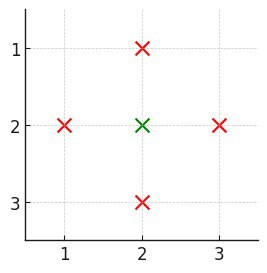

Input: n = 3, buildings = [[1,2],[2,2],[3,2],[2,1],[2,3]]

Output: 1

Explanation:

Only building [2,2] is covered as it has at least one building:
above ([1,2])
below ([3,2])
left ([2,1])
right ([2,3])
Thus, the count of covered buildings is 1.
Example 2:

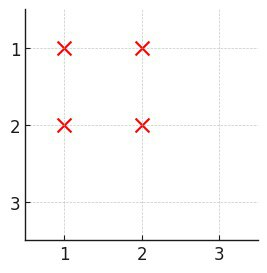

Input: n = 3, buildings = [[1,1],[1,2],[2,1],[2,2]]

Output: 0

Explanation:

No building has at least one building in all four directions.
Example 3:

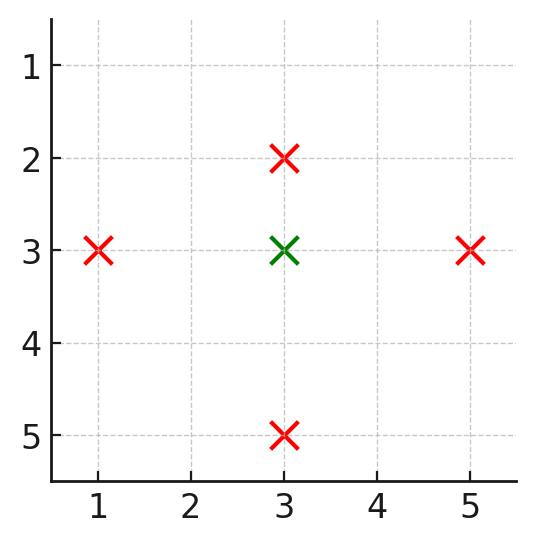

Input: n = 5, buildings = [[1,3],[3,2],[3,3],[3,5],[5,3]]

Output: 1

Explanation:

Only building [3,3] is covered as it has at least one building:
above ([1,3])
below ([5,3])
left ([3,2])
right ([3,5])
Thus, the count of covered buildings is 1.
 

Constraints:

2 <= n <= 105
1 <= buildings.length <= 105 
buildings[i] = [x, y]
1 <= x, y <= n
All coordinates of buildings are unique.

In [4]:
#right answer, this does not have issue if the buildings are in same straing line place
from collections import defaultdict
class Solution(object):
    def countCoveredBuildings(self, n, buildings):
        """
        we are given (x,y) coordinates of buildings, goatl is to find a building with has been covered in all 4
        directions. The idea is that when we take an index and if the index's x coordinate is between left and right boundary and 
        at the same time he index's y coordinate is between left and right boundary then the building is covered in all 4 directions
        """

        matrix = [[0]*n for i in range(n)] #adding matrix for visulization
        x_y_coords,y_x_coords = defaultdict(list),defaultdict(list)
        for x,y in buildings:
            matrix[x-1][y-1] = 1 # since the x,y are in 1 based index, reducing by 1 to make it as 0 based indx
            x_y_coords[x].append(y)
            y_x_coords[y].append(x)
        
        for key in x_y_coords:
            x_y_coords[key].sort()
        for key in y_x_coords:
            y_x_coords[key].sort()
        
        ans = 0
        for x,y in buildings:
            xleft,xright = y_x_coords[y][0],y_x_coords[y][-1]
            yleft,yright = x_y_coords[x][0],x_y_coords[x][-1]
            if (xleft < x < xright) and (yleft < y <yright):
                ans += 1
        for i in matrix: print(i)
        return ans


buildings = [[1,2],[2,2],[3,2],[2,1],[2,3]]
n = 3
Solution().countCoveredBuildings(n,buildings)

[0, 1, 0]
[1, 1, 1]
[0, 1, 0]


1

In [ ]:
#this fails because lets consider (2,3) (1,3) (3,3) here since the y plane 3 is not 3 < 3 and 3 > 3 the condition fails
# but it should have been passed because it was valid
class Solution(object):
    def countCoveredBuildings(self, n, buildings):
        """
        :type n: int
        :type buildings: List[List[int]]
        :rtype: int
        """
        matrix = [[0]*n for i in range(n)]
        x,y = [],[]
        for i,j in buildings:
            x.append(i)
            y.append(j)
        x.sort()
        y.sort()
        ans = 0
        for i,j in buildings:
            if (i > x[0] and i < x[n-1]) and (j > y[0] and j < y[n-1]):
                ans += 1
            matrix[i-1][j-1] = 1
        print(ans)
        return matrix
        
n = 3
buildings = [[1,2],[2,2],[3,2],[2,1],[2,3]]
matrix = Solution().countCoveredBuildings(n,buildings)
for i in matrix: print(i)

0
[0, 1, 0]
[1, 1, 1]
[0, 1, 0]


In [3]:
#this fails because lets consider (2,3) (1,3) (3,3) here since the y plane 3 is not 3 < 3 and 3 > 3 the condition fails
# but it should have been passed because it was valid
class Solution(object):
    def countCoveredBuildings(self, n, buildings):
        """
        :type n: int
        :type buildings: List[List[int]]
        :rtype: int
        """
        matrix = [[0]*n for _ in range(n)]
        x = []
        y = []
        for i, j in buildings:
            x.append(i)
            y.append(j)
        x.sort()
        y.sort()

        left = x[0]
        right = x[-1]    # use last element (max x)
        bottom = y[0]
        top = y[-1]      # use last element (max y)

        ans = 0
        for i, j in buildings:
            # strictly inside bounding box
            if (i > left and i < right) and (j > bottom and j < top):
                ans += 1
            matrix[i-1][j-1] = 1

        # If you want the matrix as well, return (ans, matrix)
        for i in matrix: print(i)
        return ans
n = 3
buildings = [[1,2],[2,2],[3,2],[2,1],[2,3]]
Solution().countCoveredBuildings(n,buildings)


[0, 1, 0]
[1, 1, 1]
[0, 1, 0]


1